# City of Johns Creek Spending for 2019
Eric Roberts

## Data from https://gisdata.fultoncountyga.gov/datasets/JohnsCreekGA::financial-expenditures/data

This pulls in a large set of data from Fulton County and shows some summaries.

In [4]:
#https://gisdata.fultoncountyga.gov/datasets/JohnsCreekGA::financial-expenditures/data

#from arcgis.gis import GIS
#gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

import json
import urllib.request
from urllib.parse import urlparse
import ipywidgets as widgets
import locale
locale.setlocale( locale.LC_ALL, '' )

jc_data = "https://opendata.arcgis.com/datasets/805dee052b8e403ab1e8b426a4fd75cf_0.geojson"
outfile = "jc_data.json"
    
urllib.request.urlretrieve(jc_data, outfile)

print ("Downloaded")

Downloaded


In [5]:
with open(outfile, "r") as read_file:
    data = json.load(read_file)

In [6]:
import pandas as pd

current_data = "[" #an array of {},

index = 0

for f in data['features']:
    
    if (f['properties']['FiscalYear'] == 2019):
        temp = f['properties']
        
        current_data += json.dumps(temp)
        current_data += ","
        index +=1

current_data = current_data[:-1] #less ","
current_data += "]"
  
df = pd.read_json (current_data)

## Spending by City Department

In [7]:
dd = df.groupby(['Department'])
gd = dd.sum()
dpt_spend = gd['Amount']

frame = { 'City Department Spending': dpt_spend}
result = pd.DataFrame(frame)
total = result['City Department Spending'].sum()

result['Percentage'] = (result['City Department Spending']/total)*100

result = result.sort_values(by=['Percentage'],ascending=False)
result.head(80)

,City Department Spending,Percentage
Department,,
Capital Projects - City Hall,8746510.42,17.847119
Capital Projects Fund (New),8336807.29,17.011126
Fire,6498941.66,13.260990
Police Administration,6261082.16,12.775641
Maintenance Accruals Fund,5460554.94,11.142178
Public Works Operations,4660441.21,9.509558
Recreation,1298495.94,2.649561
Data Processing/ MIS,1295891.18,2.644246
Planning & Zoning,1269411.61,2.590215


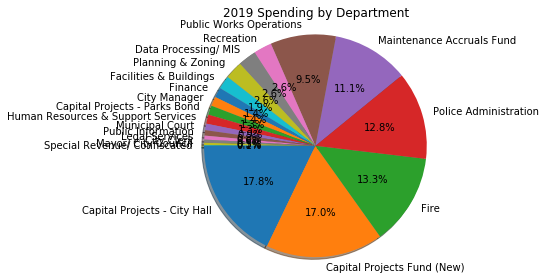

In [22]:
import matplotlib.pyplot as plt

departments = list(result.index)
percentage = result['Percentage']

#for i in range(0,len(percentage)):
#    if (percentage[i] < 3):
#        departments[i] = ""

plt.title("2019 Spending by Department")

plt.pie(percentage, labels=departments, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.tight_layout()

#plt.legend(loc="upper right")

plt.show()

## Spending by Vendor

In [9]:
de = df.groupby(['Vendor'])
ge = de.sum()
dptv_spend = ge['Amount']

frame = { 'Vendor Spending': dptv_spend}
resultv = pd.DataFrame(frame)
total = resultv['Vendor Spending'].sum()


resultv['Percentage'] = (resultv['Vendor Spending']/total)*100
resultv['Vendor Spending'] = resultv['Vendor Spending'].map('${:,.0f}'.format)

resultv = resultv.sort_values(by=['Percentage'],ascending=False)
resultv.head(40)

,Vendor Spending,Percentage
Vendor,,
ACH,"$19,657,073",40.109954
VERTICAL EARTH INC,"$4,278,075",8.729345
BLUE CROSS & BLUE SHIELD OF GA INC,"$2,435,723",4.970056
CH2M HILL ENGINEERS INC.,"$2,155,199",4.397651
ALLIED PAVING CONTRACTORS INC,"$1,982,480",4.045219
PLM VENTURES LLC,"$1,700,676",3.470202
CAROTHERS & MITCHELL LLC,"$1,449,929",2.958557
APEX INSURANCE AGENCY INC,"$1,111,704",2.268415
OPTECH RWM LLC,"$812,584",1.658064


### Query individual payees

In [23]:
#query individual payees
print(resultv.loc['TOBE JOHNSON'])
print(resultv.loc['APPEN NEWSPAPERS INC'])

Vendor Spending        $1,175
Percentage         0.00239757
Name: TOBE JOHNSON, dtype: object
Vendor Spending       $7,877
Percentage         0.0160731
Name: APPEN NEWSPAPERS INC, dtype: object


In [11]:
wx = widgets.Dropdown()
wx.options = list(resultv.index)
display(wx)

Dropdown(options=('ACH', 'VERTICAL EARTH INC', 'BLUE CROSS & BLUE SHIELD OF GA INC', 'CH2M HILL ENGINEERS INC.…

In [12]:
ff = df.loc[(df['Vendor'] == wx.value)]
summaryf = ff[["Amount","Category","Department","Description","DraftAmount","ExpenseCategory","PaymentMethod","PaymentMonthYear"]]


print(locale.currency(summaryf['Amount'].sum()))
summaryf


$19657073.14


,Amount,Category,Department,Description,DraftAmount,ExpenseCategory,PaymentMethod,PaymentMonthYear
410,10111.58,Personal Services and Employee Benefits,Fire,SPECIAL BONUS,10111.58,Regular Employees,Check,2018/11 (Nov.)
411,9579.79,Personal Services and Employee Benefits,City Clerk,Regular Earnings,9579.79,Regular Employees,Check,2018/11 (Nov.)
412,449.32,Personal Services and Employee Benefits,Planning & Zoning,Employer Medicare Tax,449.32,Medicare,Check,2018/11 (Nov.)
413,3322.41,Personal Services and Employee Benefits,Planning & Zoning,401(A)12% Contri PD 11/9,3322.41,Retirement,Check,2018/11 (Nov.)
414,322.28,Personal Services and Employee Benefits,City Manager,Employer Medicare Tax,322.28,Medicare,Check,2018/11 (Nov.)
415,366.98,Personal Services and Employee Benefits,Finance,Employer Medicare Tax,366.98,Medicare,Check,2018/11 (Nov.)
416,30.00,Personal Services and Employee Benefits,Planning & Zoning,ER HSA MATCH EXPENSE,30.00,Health,Check,2018/11 (Nov.)
417,2329.83,Personal Services and Employee Benefits,Police Administration,COURT SECURITY,2329.83,Overtime,Check,2018/11 (Nov.)
418,15.00,Personal Services and Employee Benefits,City Manager,GYM M'BERSHP,15.00,Gym Membership,Check,2018/11 (Nov.)
419,829.21,Personal Services and Employee Benefits,Finance,ER 457 MATCH EXPENSE,829.21,Retirement,Check,2018/11 (Nov.)


In [13]:
dh = df.groupby(['ExpenseCategory'])
gh = dh.sum()

for c in gh.columns:
    if (c != 'Amount'):
        del gh[c]

total = gh['Amount'].sum()
gh['Percentage'] = (gh['Amount']/total)*100

gh = gh.sort_values(by=['Amount'],ascending=False)
gh.head(20)

,Amount,Percentage
ExpenseCategory,,
Regular Employees,9011700.73,18.388236
Contractual,7856453.31,16.030971
Construction/Alterations,4857263.36,9.911171
Resurfacing,3279265.72,6.691291
Health,2396196.33,4.889402
Contracted,2148866.44,4.384729
CH2M Hill,2146799.30,4.380511
Professional Services,1922472.68,3.922776
Site Improvement,1563111.52,3.189505


In [14]:
a = widgets.Dropdown()
a.options = list(gh.index)


def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        printnice(str(change['new']))

a.observe(on_change)
display(a)


def printnice(title):
    print("Total for "+title+" : " + locale.currency(gh.loc[title]['Amount']))

printnice ('Water / Sewage')


Dropdown(options=('Regular Employees', 'Contractual', 'Construction/Alterations', 'Resurfacing', 'Health', 'Co…

Total for Water / Sewage : $90359.51
Total for Health : $2396196.33


## Where do the cops spend their money?  Or the firemen for that matter?

In [15]:
#choose from:
department_names = df["Department"].unique()

w = widgets.Dropdown()
w.options = list(department_names)
display(w)

Dropdown(options=('Recreation', 'Police Administration', 'Fire', 'City Clerk', 'Facilities & Buildings', 'City…

In [21]:
#this shows some individual transactions within the selected department
print (w.value)
dp = df.loc[df['Department'] == w.value]
dp.head(5)

Police Administration


,Amount,Bucket,Category,CreditAmount,Department,DepartmentCode,Description,DraftAmount,ExpenseCategory,ExpenseType,...,PaymentMonthYear,PaymentStatus,Program,ProgramCode,SequenceCode,ServiceCode,SubCategory,Vendor,VendorID,VendorZip
1,258.32,Operations Expenditures,Supplies,0,Police Administration,3210,ELITE K9 INC 2,258.32,Officer Supplies,Operating Expense,...,2018/10 (Oct.),NA,Other,5317011,21,100,Supplies,BANK OF AMERICA,145,30097
6,67.49,Operations Expenditures,Supplies,0,Police Administration,3210,5.11 TACTICAL ALPHARETTA,67.49,Uniforms,Operating Expense,...,2018/10 (Oct.),NA,Other,5317010,21,100,Supplies,BANK OF AMERICA,145,30097
7,145.98,Operations Expenditures,Supplies,0,Police Administration,3210,GALLS,145.98,Uniforms,Operating Expense,...,2018/10 (Oct.),NA,Other,5317010,21,100,Supplies,BANK OF AMERICA,145,30097
14,2500.00,Operations Expenditures,Purchased/Contracted Services,0,Police Administration,3210,FORSYTH CO. BOA GCIC SERVICES,2500.00,Police IGA,Operating Expense,...,2018/10 (Oct.),IS,Professional Services,5212010,21,100,Purchased Professional and Technical Services,FORSYTH CO. BOARD OF COMMISSIONERS,1351,30040
15,206.50,Operations Expenditures,Purchased/Contracted Services,0,Police Administration,3210,JOHN CLIFTON PER DIEM CLIFTON,206.50,Travel,Operating Expense,...,2018/10 (Oct.),IS,Travel,5235000,21,100,Other Purchased Services,Non-Vendor,372,30097


In [17]:
dph = dp.groupby(['ExpenseCategory'])
dgh = dph.sum()

for c in dgh.columns:
    if (c != 'Amount'):
        del dgh[c]

total = dgh['Amount'].sum()
dgh['Percentage'] = (dgh['Amount']/total)*100

dgh = dgh.sort_values(by=['Amount'],ascending=False)
dgh.head(20)

,Amount,Percentage
ExpenseCategory,,
Contracted,774242.41,59.626094
Operating Supplies,127404.39,9.811690
Electricity,107472.54,8.276694
Water / Sewage,86620.77,6.670854
Regular Employees,70467.09,5.426824
Temp/Part-Time Employee,44516.64,3.428323
Health,33058.56,2.545912
Hospitality,10253.94,0.789678
Retirement,7234.12,0.557115


In [18]:
wcc = widgets.Dropdown()
wcc.options = list(dgh.index)

print (w.value)
display(wcc)

Recreation


Dropdown(options=('Contracted', 'Operating Supplies', 'Electricity', 'Water / Sewage', 'Regular Employees', 'T…

In [19]:
filtered = df.loc[(df['Department'] == w.value) & (df['ExpenseCategory'] == wcc.value)]
summary = filtered[["Amount","Category","Department","Description","DraftAmount","ExpenseCategory","PaymentMethod"]]
summary = summary.sort_values(by=['DraftAmount'],ascending=False)
summary.head(200)

,Amount,Category,Department,Description,DraftAmount,ExpenseCategory,PaymentMethod
3551,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
8464,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
2419,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
4084,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
7742,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
402,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
5167,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
5750,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
894,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check
6599,68116.00,Purchased/Contracted Services,Recreation,PLM VENTURES LL FY2019 Parks M,68116.00,Contracted,Check


In [20]:
#for fun - how much does the city spend on Donuts?
donuts = df[df['Description'].str.contains("DONUTS")]
print (donuts['Amount'].sum())
donuts.head(10)

887.45


,Amount,Bucket,Category,CreditAmount,Department,DepartmentCode,Description,DraftAmount,ExpenseCategory,ExpenseType,...,PaymentMonthYear,PaymentStatus,Program,ProgramCode,SequenceCode,ServiceCode,SubCategory,Vendor,VendorID,VendorZip
5007,366.00,Operations Expenditures,Supplies,0,Fire,3510,SARA DONUTS CUMMING,366.00,Other,Operating Expense,...,2019/03 (Mar.),NA,Other,5317000,51,100,Supplies,BANK OF AMERICA,0000145,30097
5049,188.56,Operations Expenditures,Purchased/Contracted Services,0,Human Resources & Support Services,1540,SARA DONUTS,188.56,Other,Operating Expense,...,2019/03 (Mar.),NA,Professional Services,5212007,54,100,Purchased Professional and Technical Services,BANK OF AMERICA,0000145,30097
5805,147.19,Operations Expenditures,Purchased/Contracted Services,0,City Manager,1320,SARA DONUTS,147.19,Hospitality,Operating Expense,...,2019/04 (Apr.),NA,Other,5239001,32,100,Other Purchased Services,BANK OF AMERICA,0000145,30097
7565,66.10,Operations Expenditures,Purchased/Contracted Services,0,Human Resources & Support Services,1540,SARA DONUTS,66.10,Hospitality,Operating Expense,...,2019/05 (May),NA,Other,5239001,54,100,Other Purchased Services,BANK OF AMERICA,0000145,30097
7692,119.60,Operations Expenditures,Other Costs,0,City Manager,1320,SARA DONUTS,119.60,Unallocated,Operating Expense,...,2019/05 (May),NA,Unallocated,5791000,32,100,Contingency,BANK OF AMERICA,0000145,30097
